In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

In [4]:
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [6]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [19]:
X = data[['X_1', 'X_2']]
y = data.Y

In [8]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

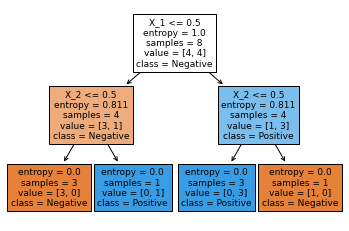

In [9]:
tree.plot_tree(clf, feature_names=list(X),
              class_names=['Negative', 'Positive'],
              filled=True);

In [14]:
df_dogs_cats = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs.csv', index_col=0)

In [15]:
df_dogs_cats

,Шерстист,Гавкает,Лазает по деревьям,Вид
0,1,1,0,собачка
1,1,1,0,собачка
2,1,1,0,собачка
3,1,1,0,собачка
4,1,0,1,котик
5,1,0,1,котик
6,1,0,1,котик
7,1,0,1,котик


In [22]:
X = df_dogs_cats[['Шерстист', 'Гавкает', 'Лазает по деревьям']]
y = df_dogs_cats['Вид']

In [23]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

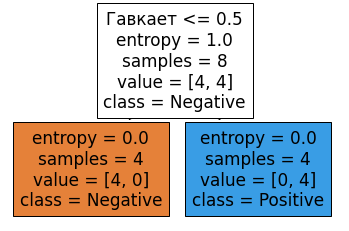

In [24]:
tree.plot_tree(clf, feature_names=list(X),
              class_names=['Negative', 'Positive'],
              filled=True);

## Расчет энтропии

In [82]:
data = pd.DataFrame()
data["X1"] = [1,1,1,1,1,1,1,1,1,0]
data["X2"] = [1,1,1,1,0,0,0,0,1,0]
data["X3"] = [0,0,0,0,1,1,1,1,1,1]
data["Y"] = [1,1,1,1, 0,0,0,0,0,0]

In [85]:
data

,X1,X2,X3,Y
0,1,1,0,1
1,1,1,0,1
2,1,1,0,1
3,1,1,0,1
4,1,0,1,0
5,1,0,1,0
6,1,0,1,0
7,1,0,1,0
8,1,1,1,0
9,0,0,1,0


In [71]:
from scipy.stats import entropy

In [93]:
entropy(data[data.X1 == 1].Y.value_counts() / len(data), base = 2)

0.9910760598382221

In [89]:
data[data.X1 == 1].Y.value_counts()

0    5
1    4
Name: Y, dtype: int64

In [96]:
data[data.X1 == 1].Y.value_counts() / len(data)

0    0.5
1    0.4
Name: Y, dtype: float64

## Расчитаем IG

### Общая энтропия

In [98]:
E_all = entropy(data.Y.value_counts() / len(data), base = 2)

In [99]:
E_all

0.9709505944546688

In [107]:
IG_x1 = E_all - ((len(data[data.X1 == 1]) / len(data)) \
                 * entropy(data[data.X1 == 1].Y.value_counts() / len(data), base = 2) \
                 + (len(data[data.X1 == 0]) / len(data)) \
                 * entropy(data[data.X1 == 0].Y.value_counts() / len(data), base = 2))

In [108]:
IG_x1

0.07898214060026887

In [109]:
IG_x2 = E_all - ((len(data[data.X2 == 1]) / len(data)) \
                 * entropy(data[data.X2 == 1].Y.value_counts() / len(data), base = 2) \
                 + (len(data[data.X2 == 0]) / len(data)) \
                 * entropy(data[data.X2 == 0].Y.value_counts() / len(data), base = 2))

In [110]:
IG_x2

0.6099865470109876

In [111]:
IG_x3 = E_all - ((len(data[data.X3 == 1]) / len(data)) \
                 * entropy(data[data.X3 == 1].Y.value_counts() / len(data), base = 2) \
                 + (len(data[data.X3 == 0]) / len(data)) \
                 * entropy(data[data.X3 == 0].Y.value_counts() / len(data), base = 2))

In [112]:
IG_x3

0.9709505944546688